<a href="https://colab.research.google.com/github/HelmyPrakoso/Portfolio/blob/main/Ken_Jee_Youtube_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Datasets 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Import the Data sets 

### Video Performance (df_performance)

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1fOEJAr8UokvyVbuayUoFAayyMhIMsqKvJhTwLgJnZZc/edit#gid=1194084369'
sheet_url_trf= sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_performance= pd.read_csv(sheet_url_trf)
df_performance.head()

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
df_performance['Date']=pd.to_datetime(df_performance['Date'])
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        111857 non-null  datetime64[ns]
 1   Video Title                 111857 non-null  object        
 2   External Video ID           111857 non-null  object        
 3   Video Length                111857 non-null  int64         
 4   Thumbnail link              111857 non-null  object        
 5   Views                       111857 non-null  int64         
 6   Video Likes Added           111857 non-null  int64         
 7   Video Dislikes Added        111857 non-null  int64         
 8   Video Likes Removed         111857 non-null  int64         
 9   User Subscriptions Added    111857 non-null  int64         
 10  User Subscriptions Removed  111857 non-null  int64         
 11  Average View Percentage     110510 non-

check duplicate

In [ ]:
df_performance[df_performance.duplicated()]

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added


### Agg_Country (df_country)

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1psZpyjN1oJcuIuRo_qI8zWvBNUZidYicSq8lKCIt3og/edit#gid=1606661519'
sheet_url_trf= sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_country_r= pd.read_csv(sheet_url_trf)
df_country_r.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [ ]:
df_country_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   External Video ID           55292 non-null  object 
 2   Video Length                55292 non-null  int64  
 3   Thumbnail link              55292 non-null  object 
 4   Country Code                54906 non-null  object 
 5   Is Subscribed               55292 non-null  bool   
 6   Views                       55292 non-null  int64  
 7   Video Likes Added           55292 non-null  int64  
 8   Video Dislikes Added        55292 non-null  int64  
 9   Video Likes Removed         55292 non-null  int64  
 10  User Subscriptions Added    55292 non-null  int64  
 11  User Subscriptions Removed  55292 non-null  int64  
 12  Average View Percentage     53854 non-null  float64
 13  Average Watch Time          538

In [ ]:
url='https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
country_code=pd.read_csv(url)
country_code

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [ ]:
# drop irrelevant columns
list_columns=country_code.columns.to_list()
keep=['name','alpha-2','region','sub-region']
for i in range(0,len(keep)):
    list_columns.remove(keep[i])
country_code.drop(columns=list_columns,inplace=True)
country_code

,name,alpha-2,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WF,Oceania,Polynesia
245,Western Sahara,EH,Africa,Northern Africa
246,Yemen,YE,Asia,Western Asia
247,Zambia,ZM,Africa,Sub-Saharan Africa


In [ ]:
df_country=pd.merge(df_country_r,country_code,left_on='Country Code',right_on='alpha-2',how='left').drop(columns='alpha-2')
df_country.rename(columns={'name':'Country','region':'Region','sub-region':'Sub Region'},inplace=True)
df_country.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added,Country,Region,Sub Region
0,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0,Hong Kong,Asia,Eastern Asia
1,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0,Montenegro,Europe,Southern Europe
2,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0,Rwanda,Africa,Sub-Saharan Africa
3,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0,United States of America,Americas,Northern America
4,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0,Germany,Europe,Western Europe


In [ ]:
df_country.rename(columns={'name':'Country','region':'Region','sub-region':'Sub Region'},inplace=True)

### Agg_Video_performance (df_vids)

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/10VC638mTolZpGGBWbOPPTnuxdyLzunPEHuh83Ze16i8/edit#gid=1317135595'
sheet_url_trf= sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_vids= pd.read_csv(sheet_url_trf)

#rename columns name
column_label=df_vids.columns.to_list()
new_label=column_label.copy()
for i in range (0,len(column_label)):
    new_label[i]=column_label[i].encode('ascii', errors='ignore').strip().decode('ascii')
df_vids.set_axis(new_label, axis=1, inplace=True)
df_vids.head()

,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
0,5p73cIRYCZg,ProjectDemoCSC478_UFCFightData,"Jun 6, 2017",0,2,0,1,0,0,0.050,NaN,8.79,0:01:04,60,1.0684,0,0.003,365,11.51
1,qfRhKHV8-t4,Predicting Crypto-Currency Price Using RNN lST...,"Nov 18, 2017",28,114,18,247,1,111,1.326,10.819,34.06,0:01:45,16558,487.2194,110,21.944,168508,5.65
2,Y_SMU701qlA,Predicting Season Long NBA Wins Using Multiple...,"Jul 10, 2018",7,45,2,159,1,34,2.883,10.667,26.93,0:02:25,6863,276.7257,33,19.772,53865,4.03
3,IFceyuL6GZY,How I Became A Data Scientist From a Business ...,"Nov 12, 2018",11,33,4,168,0,81,4.419,14.006,38.33,0:03:57,5515,363.4858,81,24.358,58816,5.72
4,RRSRKf9eQxc,Should You Get A Masters in Data Science?,"Nov 14, 2018",56,41,10,276,2,81,7.398,15.205,45.22,0:02:32,18488,782.5937,79,136.708,173610,8.40


In [ ]:
df_vids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               223 non-null    object 
 1   Video title                         223 non-null    object 
 2   Video publish time                  223 non-null    object 
 3   Comments added                      223 non-null    int64  
 4   Shares                              223 non-null    int64  
 5   Dislikes                            223 non-null    int64  
 6   Likes                               223 non-null    int64  
 7   Subscribers lost                    223 non-null    int64  
 8   Subscribers gained                  223 non-null    int64  
 9   RPM (USD)                           223 non-null    float64
 10  CPM (USD)                           221 non-null    float64
 11  Average percentage viewed (%)       223 non-n

convert average view duration into seconds

In [ ]:
df_vids['Average View Duration (second)']=df_vids['Average view duration'].apply(lambda x : int(x.split(":")[0])*3600+int(x.split(":")[1])*60+int(x.split(":")[2]))
df_vids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               223 non-null    object 
 1   Video title                         223 non-null    object 
 2   Video publish time                  223 non-null    object 
 3   Comments added                      223 non-null    int64  
 4   Shares                              223 non-null    int64  
 5   Dislikes                            223 non-null    int64  
 6   Likes                               223 non-null    int64  
 7   Subscribers lost                    223 non-null    int64  
 8   Subscribers gained                  223 non-null    int64  
 9   RPM (USD)                           223 non-null    float64
 10  CPM (USD)                           221 non-null    float64
 11  Average percentage viewed (%)       223 non-n

convert video publish time into datetime

In [ ]:
df_vids['Video publish time']=pd.to_datetime(df_vids['Video publish time'])
df_vids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video                               223 non-null    object        
 1   Video title                         223 non-null    object        
 2   Video publish time                  223 non-null    datetime64[ns]
 3   Comments added                      223 non-null    int64         
 4   Shares                              223 non-null    int64         
 5   Dislikes                            223 non-null    int64         
 6   Likes                               223 non-null    int64         
 7   Subscribers lost                    223 non-null    int64         
 8   Subscribers gained                  223 non-null    int64         
 9   RPM (USD)                           223 non-null    float64       
 10  CPM (USD)                 

### Comments (df_comments)

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1Ci0Kok7OvJdnz8EG7cv64MuUsWXwC6LchidS_czj17I/edit#gid=1605873597'
sheet_url_trf= sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_comments= pd.read_csv(sheet_url_trf)
df_comments.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


In [ ]:
from datetime import timezone
from datetime import date
df_comments['Date']=pd.to_datetime(df_comments['Date'])
df_comments['Date']=df_comments['Date'].apply(lambda x: x.replace(tzinfo=None))
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Comments     10239 non-null  object        
 1   Comment_ID   10240 non-null  object        
 2   Reply_Count  10240 non-null  int64         
 3   Like_Count   10240 non-null  int64         
 4   Date         10240 non-null  datetime64[ns]
 5   VidId        10240 non-null  object        
 6   user_ID      10240 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 560.1+ KB


check duplicates

In [ ]:
df_comments[df_comments.duplicated()]

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID


datanya bersih dari duplicated value

# Combining Datasets

## insert video length from performance data frame

In [ ]:
video_length=df_performance[['External Video ID','Video Length']].copy().drop_duplicates()
video_length.head()

,External Video ID,Video Length
0,KQ80oD_boBM,2191
1,smeFkHwnM_k,51
2,vfV4nm004VQ,2686
3,3TrAYmrmA8o,980
4,Xgg7dIKys9E,2904


combining video lenght to **df_vids** using pd.merge, also drop the unrelated columns

In [ ]:
df_combined=pd.merge(video_length,df_vids,left_on='External Video ID',right_on='Video',how='right')
df_combined.drop(columns=['External Video ID','Average view duration'],inplace=True)

In [ ]:
df_combined.head()

,Video Length,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second)
0,729,5p73cIRYCZg,ProjectDemoCSC478_UFCFightData,2017-06-06,0,2,0,1,0,0,0.050,NaN,8.79,60,1.0684,0,0.003,365,11.51,64
1,311,qfRhKHV8-t4,Predicting Crypto-Currency Price Using RNN lST...,2017-11-18,28,114,18,247,1,111,1.326,10.819,34.06,16558,487.2194,110,21.944,168508,5.65,105
2,539,Y_SMU701qlA,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,7,45,2,159,1,34,2.883,10.667,26.93,6863,276.7257,33,19.772,53865,4.03,145
3,619,IFceyuL6GZY,How I Became A Data Scientist From a Business ...,2018-11-12,11,33,4,168,0,81,4.419,14.006,38.33,5515,363.4858,81,24.358,58816,5.72,237
4,337,RRSRKf9eQxc,Should You Get A Masters in Data Science?,2018-11-14,56,41,10,276,2,81,7.398,15.205,45.22,18488,782.5937,79,136.708,173610,8.40,152


## Check NA values

In [ ]:
df_combined.isna().sum()

Video Length                          0
Video                                 0
Video title                           0
Video publish time                    0
Comments added                        0
Shares                                0
Dislikes                              0
Likes                                 0
Subscribers lost                      0
Subscribers gained                    0
RPM (USD)                             0
CPM (USD)                             2
Average percentage viewed (%)         0
Views                                 0
Watch time (hours)                    0
Subscribers                           0
Your estimated revenue (USD)          0
Impressions                           0
Impressions click-through rate (%)    0
Average View Duration (second)        0
dtype: int64

In [ ]:
df_combined.drop(columns=['CPM (USD)'],inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video Length                        223 non-null    int64         
 1   Video                               223 non-null    object        
 2   Video title                         223 non-null    object        
 3   Video publish time                  223 non-null    datetime64[ns]
 4   Comments added                      223 non-null    int64         
 5   Shares                              223 non-null    int64         
 6   Dislikes                            223 non-null    int64         
 7   Likes                               223 non-null    int64         
 8   Subscribers lost                    223 non-null    int64         
 9   Subscribers gained                  223 non-null    int64         
 10  RPM (USD)                 

## Check Outlier Data

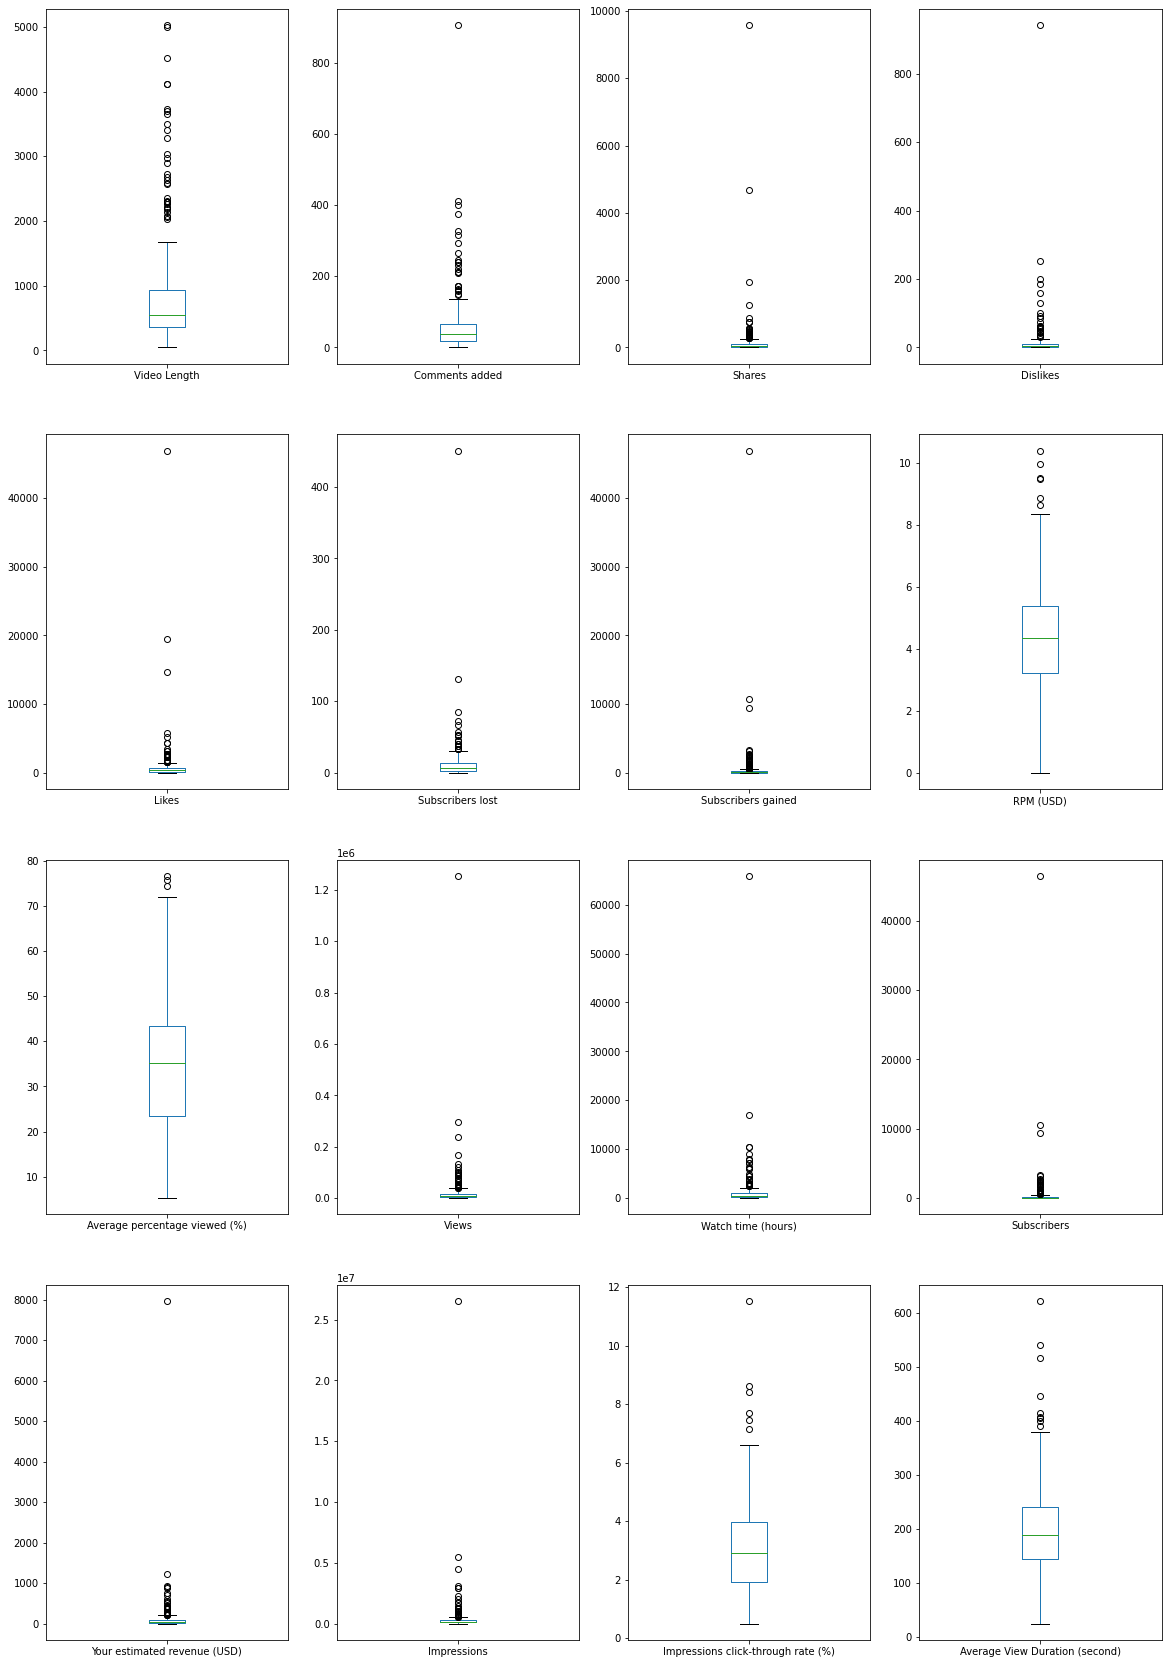

In [ ]:
list_columns = df_combined.describe().columns.to_list()

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20,30))
for i,el in enumerate(list_columns):
    a = df_combined.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

remove value of views > 1.2e6 , watch time > 60000 hours, 40000 subs, impression > 2.5e7

In [ ]:
#create treshold
T1=df_combined['Views']<1.2e6
T2=df_combined['Watch time (hours)']<11000
T3=df_combined['Impressions']<2.5e7
T4=df_combined['Your estimated revenue (USD)']<7000
T5=df_combined['Subscribers']<9000

df_combined_s=df_combined[(T1&T2&T3&T4&T5)].copy()

In [ ]:
df_combined.sort_values('Subscribers',ascending=False).head(10)

,Video Length,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second)
98,516,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,2020-05-08,907,9583,942,46903,451,46904,6.353,36.65,1253559,65850.7042,46453,7959.533,26498799,3.14,189
77,375,Ip50cXvpWY4,The Best Free Data Science Courses Nobody is T...,2020-03-09,294,4694,75,19464,131,10734,4.097,33.80,297222,10465.0467,10603,1217.046,4512254,3.24,126
71,454,8igH8qZafpo,3 Proven Data Science Projects for Beginners (...,2020-02-17,220,1935,64,14708,72,9508,3.733,35.26,237467,10560.3597,9436,885.504,3137644,4.01,160
170,549,41Clrh6nv1s,How I Would Learn Data Science in 2021 (What H...,2020-12-19,232,741,63,5869,57,3358,7.526,41.01,123515,7724.2735,3301,929.400,1699309,3.93,225
85,448,MpF9HENQjDo,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,82,744,21,3197,22,3184,4.334,30.37,102854,3887.4233,3162,445.187,778177,5.35,136
32,770,yukdXV9LR48,The Projects You Should Do To Get A Data Scien...,2019-07-30,124,868,87,5218,53,2793,3.836,25.41,131630,7153.7437,2740,504.669,1748467,4.36,195
122,2296,I3FBJdiExcg,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,174,1265,59,4321,40,2585,5.330,15.89,168183,17039.6566,2545,894.753,2040561,4.71,364
218,734,xpIFS6jZbe8,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,109,767,53,4413,46,2553,6.836,36.77,79283,5945.5420,2507,528.286,1420968,3.31,269
171,471,qV_AlRwhI3I,What is the #66DaysOfData?,2020-12-26,96,541,13,1827,33,2395,4.335,29.91,52921,2070.8803,2362,228.911,338516,3.44,140
185,518,sHRq-LshG3U,Why You Probably Won't Become a Data Scientist,2021-04-09,213,386,129,3225,67,2237,5.569,41.36,108133,6435.5906,2170,601.671,1302907,5.04,214


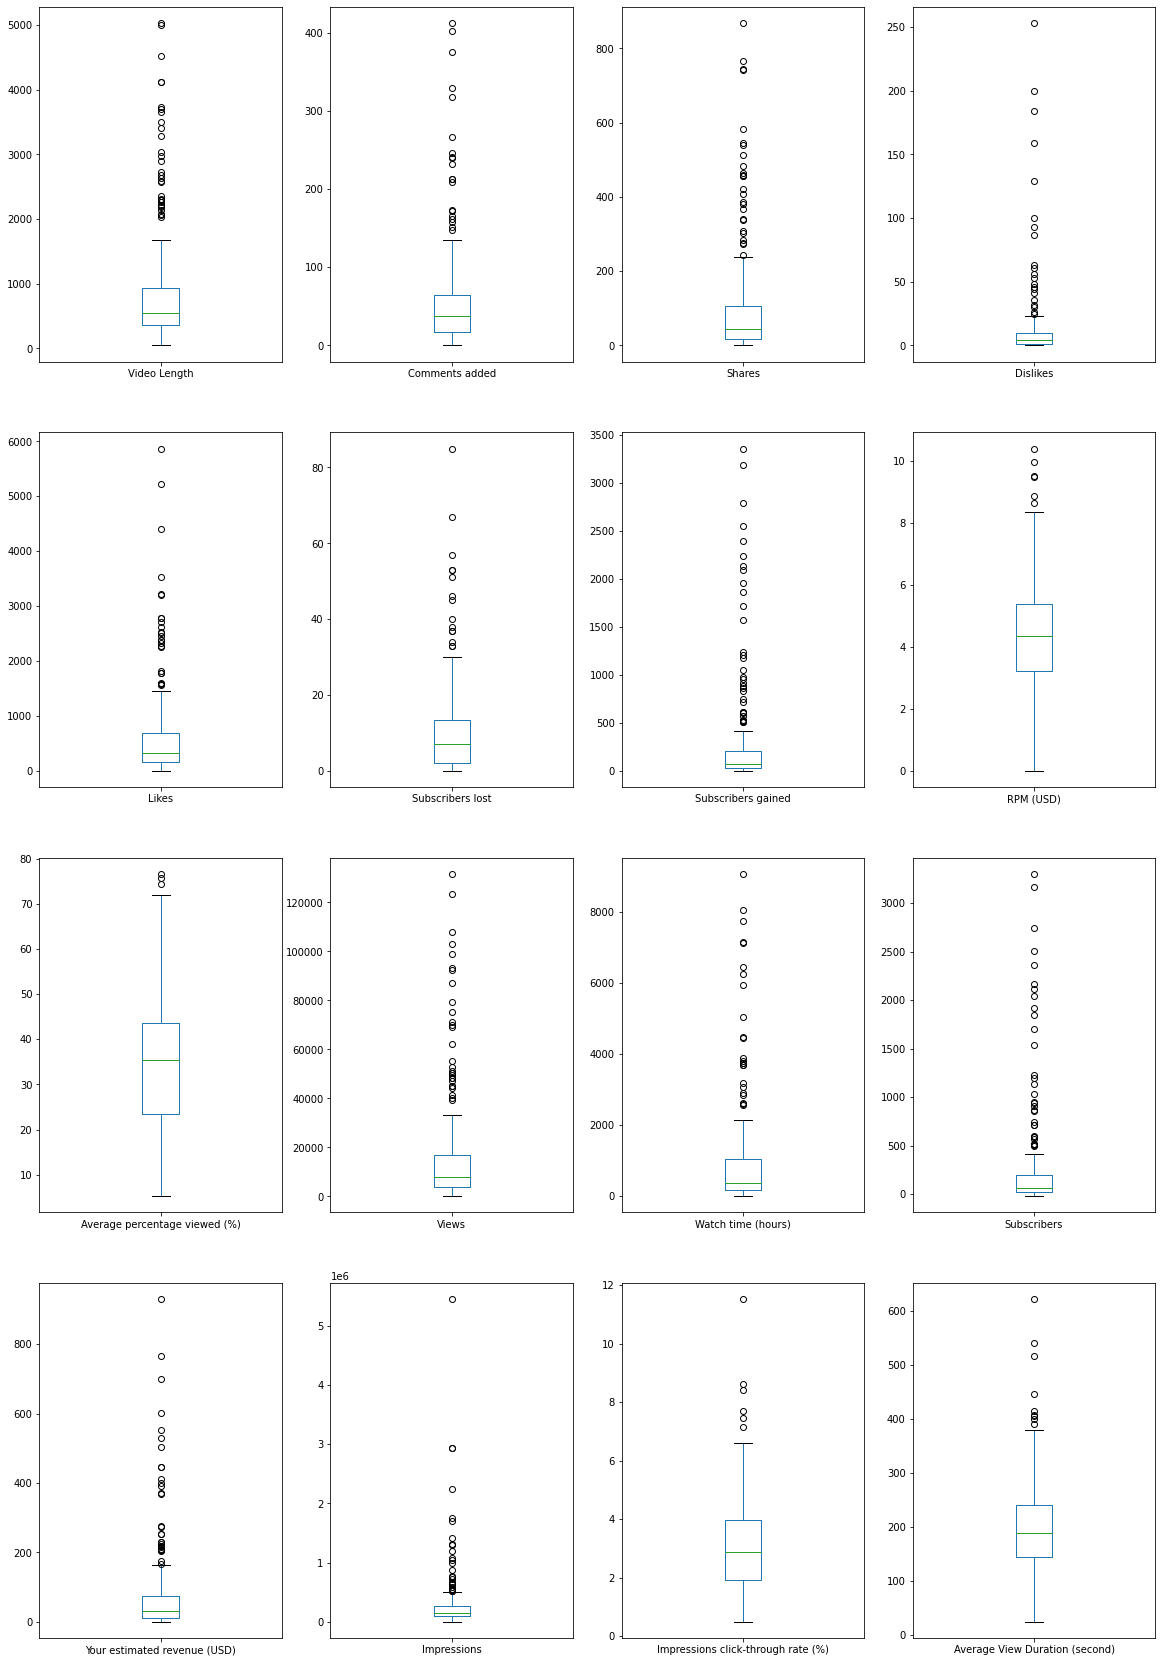

In [ ]:
list_columns = df_combined_s.describe().columns.to_list()

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20,30))
for i,el in enumerate(list_columns):
    a = df_combined_s.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
df_combined_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 222
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video Length                        219 non-null    int64         
 1   Video                               219 non-null    object        
 2   Video title                         219 non-null    object        
 3   Video publish time                  219 non-null    datetime64[ns]
 4   Comments added                      219 non-null    int64         
 5   Shares                              219 non-null    int64         
 6   Dislikes                            219 non-null    int64         
 7   Likes                               219 non-null    int64         
 8   Subscribers lost                    219 non-null    int64         
 9   Subscribers gained                  219 non-null    int64         
 10  RPM (USD)                 

# EDA

In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        111857 non-null  datetime64[ns]
 1   Video Title                 111857 non-null  object        
 2   External Video ID           111857 non-null  object        
 3   Video Length                111857 non-null  int64         
 4   Thumbnail link              111857 non-null  object        
 5   Views                       111857 non-null  int64         
 6   Video Likes Added           111857 non-null  int64         
 7   Video Dislikes Added        111857 non-null  int64         
 8   Video Likes Removed         111857 non-null  int64         
 9   User Subscriptions Added    111857 non-null  int64         
 10  User Subscriptions Removed  111857 non-null  int64         
 11  Average View Percentage     110510 non-

groupby date into a month

In [ ]:
df_performance['month']=df_performance['Date'].dt.strftime('%Y-%m')
df_performance.head(2)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added,month
0,2022-01-19,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0,2022-01
1,2022-01-19,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0,2022-01


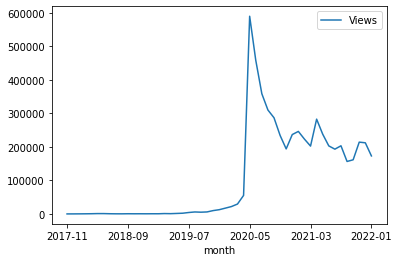

In [ ]:
monthly_views=df_performance.groupby(['month'])[['Views']].sum()
monthly_views.plot()

monthly views growth

In [ ]:
monthly_views.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 2017-11 to 2022-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Views   51 non-null     int64
dtypes: int64(1)
memory usage: 816.0+ bytes


In [ ]:
monthly_views['growth']=monthly_views['Views'].pct_change()
monthly_views.head(10)

,Views,growth
month,,
2017-11,53,NaN
2017-12,116,1.188679
2018-01,248,1.137931
2018-02,400,0.612903
2018-03,626,0.565000
2018-04,1033,0.650160
2018-05,1023,-0.009681
2018-06,601,-0.412512
2018-07,377,-0.372712


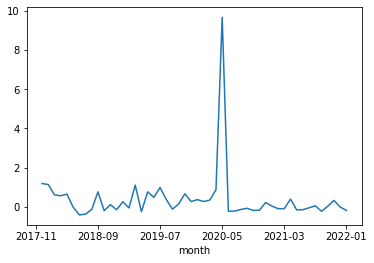

In [ ]:
monthly_views['growth'].plot()

define statistical description more comprehensive than describe

In [ ]:
#add new librarty for statistical calculation
from scipy import stats

#define range function
def des_range(df):
  max=df.max()
  min=df.min()
  delta=max-min
  d=delta.to_frame().T
  d=d.rename(index={0:'range'})
  return d

#define cv function
def cv(df):
  d=df.std()/df.mean()
  d=d.to_frame().T
  d=d.rename(index={0:'cv'})
  return d

#define more detail describe function
def describe(df, statis):
  d=df.describe()
  if 'range' in statis:
    statis.remove('range')
    d=d.append(des_range(df))
  if 'mode' in statis:
    statis.remove('mode')
    w=df.agg(lambda x: stats.mode(x)[0])
    w.rename(index={0:'mode'},inplace=True)
    d=d.append(w)
    x=df.agg(lambda x: stats.mode(x)[1])
    x.rename(index={0:'count mode'},inplace=True)
    d=d.append(x)
  if 'cv' in statis:
    statis.remove('cv')
    d=d.append(cv(df))
  d=d.append(df.agg(statis))
  return d

In [ ]:
list_columns = df_combined_s.describe().columns.to_list()
describe(df_combined_s[list_columns], ['skew','var','kurt','range','cv','mode'])

,Video Length,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second)
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02,219.000000,219.000000,2.190000e+02,219.000000,219.000000
mean,903.904110,57.534247,101.196347,12.611872,637.356164,10.333333,279.630137,4.430265,34.188767,1.649117e+04,9.757135e+02,269.296804,82.698160,2.957110e+05,3.071187,200.493151
std,963.489270,69.465472,151.100558,30.860444,873.069346,12.451128,560.483372,1.802198,15.231429,2.323305e+04,1.544878e+03,552.703156,137.647236,5.316678e+05,1.684642,94.692470
min,47.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.230000,6.000000e+01,1.068400e+00,-21.000000,0.000000,3.650000e+02,0.490000,25.000000
25%,367.000000,17.500000,18.000000,1.000000,160.500000,2.000000,26.500000,3.217000,23.515000,3.815000e+03,1.754409e+02,19.000000,12.014500,9.787100e+04,1.910000,144.500000
50%,549.000000,37.000000,45.000000,4.000000,332.000000,7.000000,66.000000,4.334000,35.490000,8.026000e+03,3.697456e+02,62.000000,31.575000,1.528520e+05,2.860000,189.000000
75%,938.500000,64.500000,106.500000,10.000000,683.000000,13.500000,208.500000,5.382500,43.640000,1.710050e+04,1.035292e+03,202.000000,73.714500,2.597265e+05,3.965000,241.500000
max,5029.000000,412.000000,868.000000,253.000000,5869.000000,85.000000,3358.000000,10.387000,76.600000,1.316300e+05,9.057275e+03,3301.000000,929.400000,5.447045e+06,11.510000,621.000000
range,4982.000000,412.000000,868.000000,253.000000,5868.000000,85.000000,3358.000000,10.387000,71.370000,1.315700e+05,9.056207e+03,3322.000000,929.400000,5.446680e+06,11.020000,596.000000
mode,59.000000,7.000000,5.000000,2.000000,131.000000,0.000000,19.000000,3.125000,16.980000,2.794000e+03,1.068400e+00,7.000000,0.000000,3.650000e+02,1.720000,230.000000


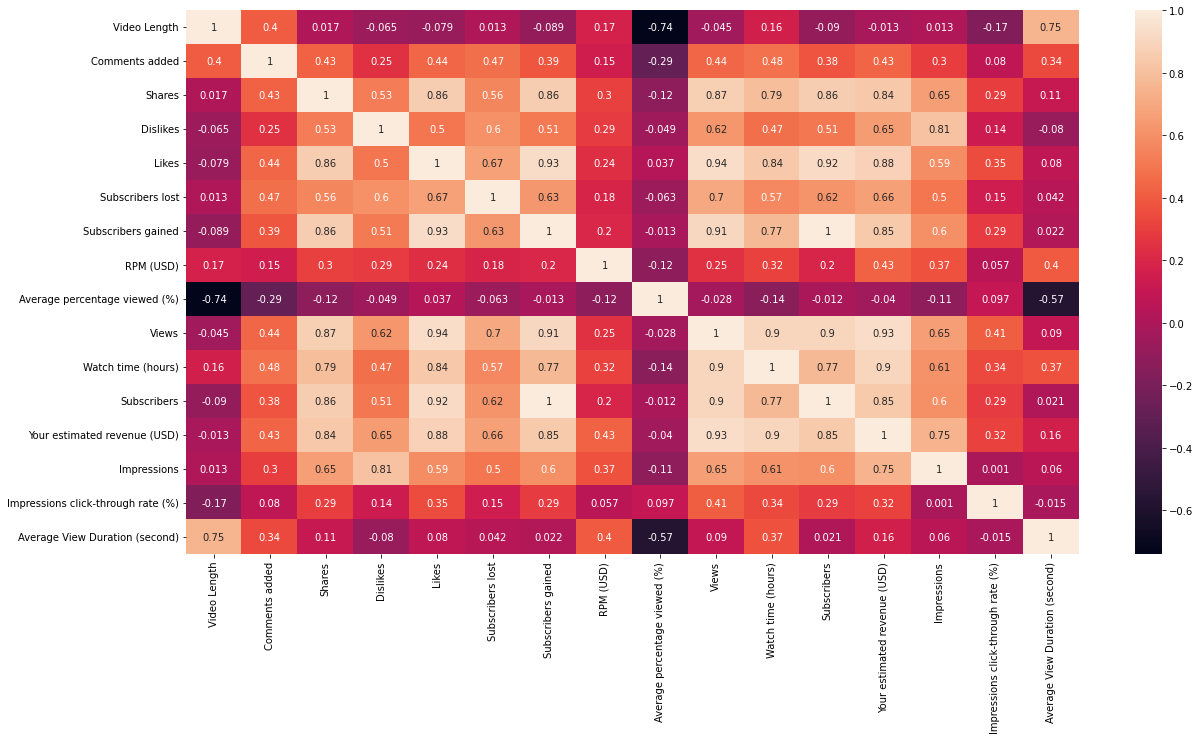

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_combined_s.corr(), annot=True) 

In [ ]:
#g=sns.PairGrid(df_combined_s[list_columns])
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)

# What Interval time Ken Jee should upload Video

in this section, we will show the number of viewers every day for each videos

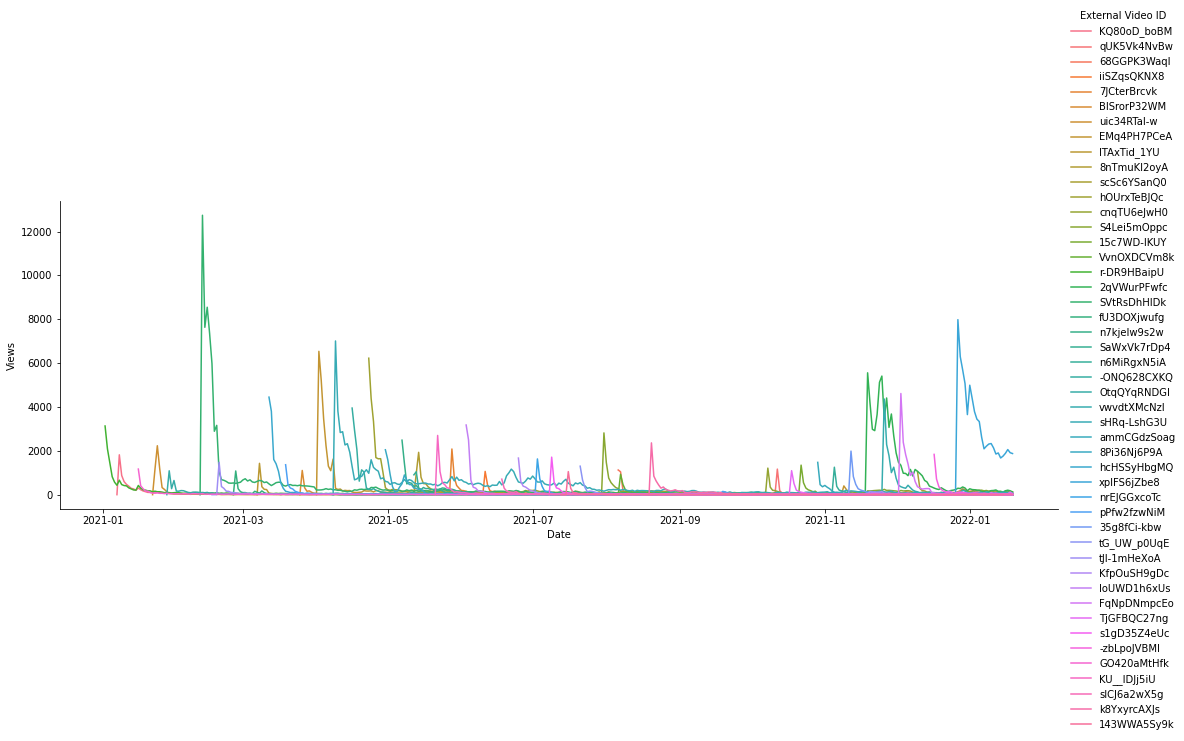

In [ ]:
# take a video which published in 2021

start_date=pd.DataFrame({'date':[date(2021,1,1)]})
end_date=pd.DataFrame({'date':[date(2021,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])
limit=end_date.copy()
limit=limit+timedelta(days=30)

#filter video which published in range date
df_2=df_vids[(df_vids['Video publish time']>=start_date['date'][0])&(df_vids['Video publish time']<=end_date['date'][0])]
df_2=df_2[['Video','Video publish time']]
#convert video id into list
vids_list=df_2.Video.to_list()
#pick df performance which video in list above with limited date
df=df_performance[(df_performance['External Video ID'].isin(vids_list))&(df_performance['Date']<=limit['date'][0])].copy()
df=df[['External Video ID','Date','Views']]
df

# combine into one dataframe
df_c=pd.merge(df,df_2,left_on='External Video ID',right_on='Video',how='left').drop(columns='Video')

# create period between publish time and daily report
df_c['Period_number']=(df_c['Date']-df_c['Video publish time'])
df_c['Period_number']=pd.to_numeric(df_c['Period_number'].dt.days, downcast='integer')


#ploting
sns.relplot(x='Date',y='Views',hue='External Video ID',data=df,kind='line',aspect=3)

In [ ]:
# check period with < 0
df_c[df_c['Period_number']<0]

,External Video ID,Date,Views,Video publish time,Period_number
1095,xpIFS6jZbe8,2021-12-26,3,2021-12-27,-1
2113,FqNpDNmpcEo,2021-12-02,2,2021-12-03,-1
2412,vwvdtXMcNzI,2021-11-25,1,2021-11-26,-1
2709,2qVWurPFwfc,2021-11-18,0,2021-11-19,-1
2973,35g8fCi-kbw,2021-11-11,1,2021-11-12,-1
3262,n6MiRgxN5iA,2021-11-04,3,2021-11-05,-1
3797,15c7WD-lKUY,2021-10-21,2,2021-10-22,-1
3912,TjGFBQC27ng,2021-10-17,3,2021-10-18,-1
4143,qUK5Vk4NvBw,2021-10-11,0,2021-10-12,-1
4187,qUK5Vk4NvBw,2021-10-10,0,2021-10-12,-2


In [ ]:
#check video with external link SaWxVk7rDp4
df_c[df_c['External Video ID']=='SaWxVk7rDp4']

,External Video ID,Date,Views,Video publish time,Period_number
21,SaWxVk7rDp4,2022-01-19,5,2021-05-13,251
81,SaWxVk7rDp4,2022-01-18,4,2021-05-13,250
115,SaWxVk7rDp4,2022-01-17,7,2021-05-13,249
135,SaWxVk7rDp4,2022-01-16,9,2021-05-13,248
215,SaWxVk7rDp4,2022-01-15,10,2021-05-13,247
...,...,...,...,...,...
8421,SaWxVk7rDp4,2021-05-16,329,2021-05-13,3
8445,SaWxVk7rDp4,2021-05-15,233,2021-05-13,2
8468,SaWxVk7rDp4,2021-05-14,303,2021-05-13,1
8487,SaWxVk7rDp4,2021-05-13,1046,2021-05-13,0


due to the value of a period number in -1 being 907, so the video publish time is should back one day before

In [ ]:
# change video publish for id 'SaWxVk7rDp4'
index=df_c['External Video ID']=='SaWxVk7rDp4'
df_c.loc[index,'Video publish time']=df_c.loc[index,'Video publish time'].apply(lambda x: x-timedelta(days=1))
df_c[index]

,External Video ID,Date,Views,Video publish time,Period_number
21,SaWxVk7rDp4,2022-01-19,5,2021-05-12,251
81,SaWxVk7rDp4,2022-01-18,4,2021-05-12,250
115,SaWxVk7rDp4,2022-01-17,7,2021-05-12,249
135,SaWxVk7rDp4,2022-01-16,9,2021-05-12,248
215,SaWxVk7rDp4,2022-01-15,10,2021-05-12,247
...,...,...,...,...,...
8421,SaWxVk7rDp4,2021-05-16,329,2021-05-12,3
8445,SaWxVk7rDp4,2021-05-15,233,2021-05-12,2
8468,SaWxVk7rDp4,2021-05-14,303,2021-05-12,1
8487,SaWxVk7rDp4,2021-05-13,1046,2021-05-12,0


In [ ]:
df_c['External Video ID'].nunique()

47

In [ ]:
# recalculate period between publish time and daily report
df_c['Period_number']=(df_c['Date']-df_c['Video publish time'])
df_c['Period_number']=pd.to_numeric(df_c['Period_number'].dt.days, downcast='integer')

# remove <0 period
df_c=df_c[df_c['Period_number']>=0]

In [ ]:
# interpreting grouping period number of Views in period
period=df_c.groupby('Period_number',as_index=False).agg({'Views':['mean','min','median','max','std','mad']})
period.columns=period.columns.map('_'.join).str.rstrip("_")
period.head(10)

,Period_number,Views_mean,Views_min,Views_median,Views_max,Views_std,Views_mad
0,0,2605.042553,710,1671.0,12743,2346.340582,1651.208692
1,1,1522.957447,181,789.0,7633,1716.416882,1279.770032
2,2,1050.191489,80,391.0,8549,1591.899653,1029.434133
3,3,780.425532,64,276.0,7363,1359.934729,808.712540
4,4,651.297872,46,192.0,5981,1133.774897,695.234948
5,5,589.106383,44,180.0,5126,1112.906677,663.533726
6,6,531.382979,30,155.0,5410,1092.697232,619.103667
7,7,335.595745,29,105.0,3786,740.368553,365.116342
8,8,323.510638,16,104.0,4411,796.343597,366.082390
9,9,279.468085,17,90.0,3336,644.983817,306.371209


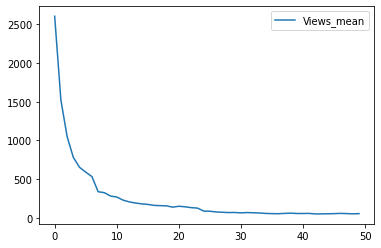

In [ ]:
period[['Views_mean']][:50].plot()

if using assuming 2021
when uploading a video, it can provide a minimum number of views of 700 and an average of 2608, even though it has a high deviation. Therefore, if, for example, Ken wants to want a video with an average viewer of around 2000, then it takes two video uploads for one week in 3-4 days. But you need to consider what kind of content. That's all that needs to be done, so getting a great video within three days is very difficult if you do it yourself. It's different if you do it with a professional team.

# Which Country is Most View Ken Jee Videos?

In [ ]:
df=df_country.copy()
df

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added,Country,Region,Sub Region
0,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0,Hong Kong,Asia,Eastern Asia
1,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0,Montenegro,Europe,Southern Europe
2,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0,Rwanda,Africa,Sub-Saharan Africa
3,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0,United States of America,Americas,Northern America
4,幻 Hot Topics in Tech: Data Science Explained ...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0,Germany,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55287,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MM,False,1,0,0,0,0,0,0.622642,33.000000,0,Myanmar,Asia,South-eastern Asia
55288,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,SA,True,14,1,0,0,0,0,0.515569,27.325143,0,Saudi Arabia,Asia,Western Asia
55289,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,DZ,False,2,0,0,0,0,0,0.782075,41.450000,0,Algeria,Africa,Northern Africa
55290,#66DaysOfData - 3 Reasons to Start!,sICJ6a2wX5g,53,https://i.ytimg.com/vi/sICJ6a2wX5g/hqdefault.jpg,MX,False,11,0,0,0,0,0,0.636178,33.717455,0,Mexico,Americas,Latin America and the Caribbean


In [ ]:
agg_country=df.groupby(['Country'],as_index=False).agg({'Views':'sum','Average View Percentage':'mean','Average Watch Time':'mean'})
agg_country

,Country,Views,Average View Percentage,Average Watch Time
0,Afghanistan,867,0.268558,137.758473
1,Albania,2763,0.240977,150.988097
2,Algeria,14641,0.334212,185.784262
3,American Samoa,38,0.074310,42.130950
4,Andorra,193,0.346120,225.023577
...,...,...,...,...
227,Western Sahara,326,0.388592,200.904450
228,Yemen,740,0.218130,114.589605
229,Zambia,2073,0.394836,223.278993
230,Zimbabwe,3975,0.409843,256.418814


In [ ]:
agg_country.sort_values(by='Views',ascending=False).head(10)

,Country,Views,Average View Percentage,Average Watch Time
219,United States of America,1354450,0.383555,234.257093
94,India,1155510,0.275479,153.141914
218,United Kingdom of Great Britain and Northern I...,239177,0.388439,235.426858
36,Canada,222373,0.373351,226.829620
76,Germany,172165,0.377259,223.647406
11,Australia,116295,0.397880,239.875936
28,Brazil,114161,0.368527,220.830479
95,Indonesia,112500,0.308483,180.162337
70,France,78852,0.354281,212.190761
187,Singapore,75794,0.360167,206.979716


due to the limitation of language, Indonesia and India have more views but the average watch time is less than 200 hours, so you can insert subtitles with Hindi and Indonesian language. despite translating into another language. You can insert subtitles in English because in the top 10 countries English is secondary languages.

# Comment Analysis

Several in the comments section corresponded to each other in this section. Here are the questions 

1. what is the average user's emotion when typing the comments?
2. what kind of comments are common from viewers?
3. what are viewer's complaints when they see ken's Videos?

so this section will be processed sentimental analysis and topic modeling 

## Topic Modelling

in this section, the topic modelling will need manipulating string and cleaning unrelated text

### Data Cleaning and Preprocessing for topic modelling

In [ ]:
# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords


#downlad resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=df_comments[['Comments']].copy()
df

,Comments
0,Thanks for this video Ken.\n\nI decided to go ...
1,Hello ken jee!!! I'm doing a graduation on Com...
2,"Thanks for this video, man. So useful. I'll me..."
3,Great video!!! I started learning Python 8 mon...
4,Been watching hours of your material (and Tina...
...,...
10235,"Dear Ken,\nMay I know how the input data with ..."
10236,What's your prediction Ken for 2018 or at leas...
10237,Nice. I have some nice models for this doing v...
10238,Great video! Can you please post the github li...


In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
df['Comments']=df['Comments'].astype(str)
df['clean']=df['Comments'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

,Comments,clean
0,Thanks for this video Ken.\n\nI decided to go ...,thanks video ken decided go tech learning web ...
1,Hello ken jee!!! I'm doing a graduation on Com...,hello ken jee graduation computer science real...
2,"Thanks for this video, man. So useful. I'll me...",thanks video man useful meet senior lead data ...
3,Great video!!! I started learning Python 8 mon...,great video started learning python months ago...
4,Been watching hours of your material (and Tina...,watching hours material tina know easy field f...
...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",dear ken may know input data open high low clo...
10236,What's your prediction Ken for 2018 or at leas...,prediction ken least next months triple bottom
10237,Nice. I have some nice models for this doing v...,nice nice models well make
10238,Great video! Can you please post the github li...,great video please post github link thank


In [ ]:
# create text list
text = df['clean']
text_list =  [i.split() for i in text]
#text_list

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(4205 unique tokens: ['ai', 'bit', 'css', 'current', 'data_science']...)


In [ ]:
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

10240
[(87, 1), (198, 1), (455, 1), (686, 1), (693, 6), (743, 3), (744, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

### Modelling time

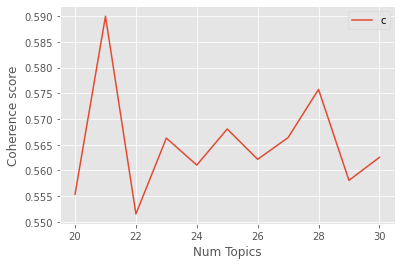

Num Topics = 20  has Coherence Value of 0.555385
Num Topics = 21  has Coherence Value of 0.589968
Num Topics = 22  has Coherence Value of 0.551561
Num Topics = 23  has Coherence Value of 0.566294
Num Topics = 24  has Coherence Value of 0.56105
Num Topics = 25  has Coherence Value of 0.568058
Num Topics = 26  has Coherence Value of 0.562165
Num Topics = 27  has Coherence Value of 0.566389
Num Topics = 28  has Coherence Value of 0.575749
Num Topics = 29  has Coherence Value of 0.558082
Num Topics = 30  has Coherence Value of 0.562547


In [ ]:
# Create a chart of what number of topics that can be clustered 
start=20
limit=31
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
# show graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#Print the coherence scores
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Number of topics 21 is higher than others so we decide to cluster into 21 topics

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=21) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.070*"thank_ken" + 0.067*"hello_ken" + 0.057*"thank_sharing" + 0.039*"would_love" + 0.029*"thank_sharing_thank_sharing" + 0.025*"data_analysis" + 0.016*"content_always" + 0.015*"last_year" + 0.015*"good" + 0.015*"trying_get"
Topic: 1 Word: 0.171*"hey_ken" + 0.122*"thank_much" + 0.042*"thank_much_thank_much" + 0.024*"much" + 0.022*"deserve" + 0.020*"let_know" + 0.019*"thank" + 0.016*"collect_data" + 0.016*"answer_questions" + 0.014*"thank_much_thank_much_thank_much"
Topic: 2 Word: 0.046*"thanks_sharing" + 0.036*"would_recommend" + 0.035*"nice_video" + 0.024*"feel_like" + 0.020*"pursue_career" + 0.020*"long_time" + 0.018*"thanks_sharing_thanks_sharing" + 0.017*"data_science" + 0.017*"link" + 0.017*"great_vid"
Topic: 3 Word: 0.143*"hi_ken" + 0.030*"data_science" + 0.026*"helped_lot" + 0.020*"awesome_content" + 0.020*"look_forward" + 0.015*"well_done" + 0.013*"wish" + 0.012*"hi" + 0.012*"helped_lot_helped_lot" + 0.012*"industrial_engineering"
Topic: 4 Word: 0.040*"ken_jee" 

In [ ]:
# donwload pyLDAvis for visualization
! pip install pyLDAvis

In [ ]:
import gensim
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.display(data)

from the chart above, there are 21 number of cluster, but we can aggregate some clusters that have similarities,

so if we Aggregated the topic

1. Data Science career, background and advice. (1,2,3,5,6,8,4,16,11)
2. Machine learning, AI, and DL (7,9)
3. Technincal Issue or Problem (20,15)
4. The topic of video (19,13,17)
5. Appreciation of Video (11,18,12,10,21,14)

In [ ]:
pyLDAvis.save_html(data, 'lda-gensim.html')

## Sentiment Analysis with TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
df_text=df_comments.copy()
df_text['Comments']

0        Thanks for this video Ken.\n\nI decided to go ...
1        Hello ken jee!!! I'm doing a graduation on Com...
2        Thanks for this video, man. So useful. I'll me...
3        Great video!!! I started learning Python 8 mon...
4        Been watching hours of your material (and Tina...
                               ...                        
10235    Dear Ken,\nMay I know how the input data with ...
10236    What's your prediction Ken for 2018 or at leas...
10237    Nice. I have some nice models for this doing v...
10238    Great video! Can you please post the github li...
10239    Hi Ken\n\nI've been researching about this. Wo...
Name: Comments, Length: 10240, dtype: object

### Cleaning the datasets

In [ ]:
# convert to string
df_text['Comments']=df_text['Comments'].astype(str)

# removing weird spaces
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)

# Removing links, brackets, numbers, punctuations etc
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

# removing stop words
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

# steming, lemmatization and tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    #words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words]
    return words_lem

In [ ]:
df_text['clean']=df_text['Comments'].apply(lambda x: remove_spaces(x))
df_text['clean']=df_text['clean'].apply(lambda x: clean_text(x))
df_text['clean']=df_text['clean'].apply(lambda x: remove_stopword(x))
df_text['clean']=df_text['clean'].apply(lambda x: lexicon_normalization(x))
df_text

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,clean
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22 08:13:29,xpIFS6jZbe8,user_981,"[thanks, video, ken, decided, go, tech, learni..."
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22 01:09:46,xpIFS6jZbe8,user_213,"[hello, ken, jee, im, graduation, computer, sc..."
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21 23:59:05,rEWPqw6rMGI,user_1065,"[thanks, video, man, useful, ill, meet, im, se..."
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21 23:00:37,xpIFS6jZbe8,user_3391,"[great, video, started, learning, python, mont..."
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21 20:24:20,sHRq-LshG3U,user_2816,"[watching, hour, material, tina, know, easy, f..."
...,...,...,...,...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",UgzX5v48CJAPbvynwTR4AaABAg,1,0,2018-07-06 07:08:39,qfRhKHV8-t4,user_5850,"[dear, ken, may, know, input, data, openhighlo..."
10236,What's your prediction Ken for 2018 or at leas...,UgwdI9ydb2nk-FIJ1sN4AaABAg,0,0,2018-05-15 00:01:12,qfRhKHV8-t4,user_2676,"[whats, prediction, ken, least, next, month, t..."
10237,Nice. I have some nice models for this doing v...,UgyTi5fEIpZBoED9Fc94AaABAg,0,0,2018-05-04 20:58:54,qfRhKHV8-t4,user_4533,"[nice, nice, model, well, make]"
10238,Great video! Can you please post the github li...,UgyhJTCKn88b0lggR794AaABAg,0,0,2018-02-20 16:46:19,qfRhKHV8-t4,user_3368,"[great, video, please, post, github, link, thank]"


### Sentiment text 

In [ ]:

def get_sentiment(text): 
    ''' 
    Utility function to classify sentiment of text 
    using textblob's sentiment method 
    '''
    # create TextBlob object of text 
    analysis = TextBlob(text) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def get_sentiment_score(text): 
    ''' 
    Utility function to classify sentiment of text 
    using textblob's sentiment method 
    '''
    # create TextBlob object of text 
    analysis = TextBlob(text) 
    
    # sentiment_score
    score=analysis.sentiment.polarity
    return score

In [ ]:
df_text['sentiment']=df_text['clean'].apply(lambda x: get_sentiment(' '.join(x)))
df_text['sentiment_score']=df_text['clean'].apply(lambda x: get_sentiment_score(' '.join(x)))

In [ ]:
df_text.sort_values(by='sentiment_score').head(50)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,clean,sentiment,sentiment_score
880,Data science is such a cruel field.,UgyNKVXvjjNhYS16FkV4AaABAg,2,1,2021-10-26 18:54:05,7JCterBrcvk,user_659,"[data, science, cruel, field]",negative,-1.000000
29,A boring answer yet practical.,UgypmuA-gsUaks3zrMN4AaABAg,0,0,2022-01-18 09:06:04,Q9FjwzKFPuM,user_3706,"[boring, answer, yet, practical]",negative,-1.000000
1785,Might consider learning UX no code writing \nF...,UgwvR_S2trfgBU4qSXl4AaABAg,1,1,2021-06-12 12:14:31,sHRq-LshG3U,user_2743,"[might, consider, learning, ux, code, writing,...",negative,-0.875000
9035,Helo sir is there any differrance between data...,UgzVha_Otpj49OVORZl4AaABAg,2,1,2020-05-15 06:51:44,4OZip0cgOho,user_3745,"[helo, sir, differrance, data, science, degree...",negative,-0.800000
6564,"Can I, a person with no maths background or ba...",UgxtCe7XiaVXxkio7M94AaABAg,2,2,2020-08-14 07:32:29,zSwM5uVeylU,user_2158,"[person, math, background, base, even, think, ...",negative,-0.800000
6726,Very annoying background music. Also in podcas...,UgzBiuuBr3lSkfitJnJ4AaABAg,1,3,2020-08-07 15:42:49,4OZip0cgOho,user_2326,"[annoying, background, music, also, podcast, o...",negative,-0.800000
5078,Bloody well done mate!!,Ugy7roTf5NZqqe3Wkh54AaABAg,1,1,2020-10-17 15:58:05,agHKuUoMwvY,user_4748,"[bloody, well, done, mate]",negative,-0.800000
8548,I hate collaborating but the reason why I want...,Ugys41sSsqexEIkCQXR4AaABAg,1,3,2020-05-28 20:17:03,m5pwx3hgtzM,user_3640,"[hate, collaborating, reason, want, take, data...",negative,-0.800000
9454,"I was also wondering, for the regression, sinc...",UgyoRmXvQxbpIs6-cGx4AaABAg,2,3,2020-04-30 11:53:49,7O4dpR9QMIM,user_1901,"[also, wondering, regression, since, use, dumm...",negative,-0.800000
2020,Stupid f**k 😀😀😀 . I like it though 🤠,UgwEs_De8Zbrc4_mLC14AaABAg,0,0,2021-05-26 03:15:44,SVtRsDhHlDk,user_3577,"[stupid, fk, 😀😀😀, like, though, 🤠]",negative,-0.800000


In [ ]:
df_text

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,clean,sentiment,sentiment_score
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22 08:13:29,xpIFS6jZbe8,user_981,"[thanks, video, ken, decided, go, tech, learni...",positive,0.190000
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22 01:09:46,xpIFS6jZbe8,user_213,"[hello, ken, jee, im, graduation, computer, sc...",positive,0.325000
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21 23:59:05,rEWPqw6rMGI,user_1065,"[thanks, video, man, useful, ill, meet, im, se...",neutral,0.000000
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21 23:00:37,xpIFS6jZbe8,user_3391,"[great, video, started, learning, python, mont...",positive,0.416667
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21 20:24:20,sHRq-LshG3U,user_2816,"[watching, hour, material, tina, know, easy, f...",positive,0.341667
...,...,...,...,...,...,...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",UgzX5v48CJAPbvynwTR4AaABAg,1,0,2018-07-06 07:08:39,qfRhKHV8-t4,user_5850,"[dear, ken, may, know, input, data, openhighlo...",neutral,0.000000
10236,What's your prediction Ken for 2018 or at leas...,UgwdI9ydb2nk-FIJ1sN4AaABAg,0,0,2018-05-15 00:01:12,qfRhKHV8-t4,user_2676,"[whats, prediction, ken, least, next, month, t...",negative,-0.150000
10237,Nice. I have some nice models for this doing v...,UgyTi5fEIpZBoED9Fc94AaABAg,0,0,2018-05-04 20:58:54,qfRhKHV8-t4,user_4533,"[nice, nice, model, well, make]",positive,0.600000
10238,Great video! Can you please post the github li...,UgyhJTCKn88b0lggR794AaABAg,0,0,2018-02-20 16:46:19,qfRhKHV8-t4,user_3368,"[great, video, please, post, github, link, thank]",positive,0.800000


In [ ]:
n_sentiment=df_text.groupby('sentiment').agg({'Comments':'count'})
n_sentiment

,Comments
sentiment,
negative,809
neutral,2487
positive,6944


Yup, here You can see that negative comments are not always negative, and the negative ones are just slang that occur to the commentators, but for the negative comments, among others, because they don't like 

1. audio
2. backsound
3. The IDE used is not friendly use(spyder) (not jupyter or vscode)

## Sentiment with Emotion

In [ ]:
!pip install nrclex
from nrclex import NRCLex

     |████████████████████████████████| 396 kB 4.8 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=84ef7003eaa495266189dbaab6c09b0faea9e38ec5124bc23cb715f5edfb2f6e
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
df['emotion']=df['clean'].apply(lambda x: NRCLex(x))
df['emotion_score']=df['emotion'].apply(lambda x: x.affect_frequencies)
df['emotion_top']=df['emotion'].apply(lambda x: x.top_emotions[0][0])

# emotion scoring plot
df['emotion_fear']=df['emotion_score'].apply(lambda x: x['fear'])
df['emotion_anger']=df['emotion_score'].apply(lambda x: x['anger'])
df['emotion_anticip']=df['emotion_score'].apply(lambda x: x['anticip'])
df['emotion_trust']=df['emotion_score'].apply(lambda x: x['trust'])
df['emotion_surprise']=df['emotion_score'].apply(lambda x: x['surprise'])
df['emotion_positive']=df['emotion_score'].apply(lambda x: x['positive'])
df['emotion_negative']=df['emotion_score'].apply(lambda x: x['negative'])
df['emotion_sadness']=df['emotion_score'].apply(lambda x: x['sadness'])
df['emotion_disgust']=df['emotion_score'].apply(lambda x: x['disgust'])
df['emotion_joy']=df['emotion_score'].apply(lambda x: x['joy'])

In [ ]:
df

,Comments,clean,emotion,emotion_score,emotion_top,emotion_fear,emotion_anger,emotion_anticip,emotion_trust,emotion_surprise,emotion_positive,emotion_negative,emotion_sadness,emotion_disgust,emotion_joy
0,Thanks for this video Ken.\n\nI decided to go ...,thanks video ken decided go tech learning web ...,<nrclex.NRCLex object at 0x7feaf677e610>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.083333,0.000000,0.666667,0.00,0.083333,0.083333,0.083333
1,Hello ken jee!!! I'm doing a graduation on Com...,hello ken jee graduation computer science real...,<nrclex.NRCLex object at 0x7feaf67dcf90>,"{'fear': 0.06060606060606061, 'anger': 0.03030...",positive,0.060606,0.030303,0.0,0.151515,0.060606,0.333333,0.00,0.030303,0.030303,0.151515
2,"Thanks for this video, man. So useful. I'll me...",thanks video man useful meet senior lead data ...,<nrclex.NRCLex object at 0x7feaf677e5d0>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.250000,0.000000,0.500000,0.00,0.000000,0.000000,0.000000
3,Great video!!! I started learning Python 8 mon...,great video started learning python months ago...,<nrclex.NRCLex object at 0x7feaf677e490>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.000000,0.000000,0.571429,0.00,0.142857,0.142857,0.142857
4,Been watching hours of your material (and Tina...,watching hours material tina know easy field f...,<nrclex.NRCLex object at 0x7feaf677e6d0>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.250000,0.000000,0.375000,0.00,0.000000,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",dear ken may know input data open high low clo...,<nrclex.NRCLex object at 0x7feaf176d1d0>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.000000,0.000000,0.666667,0.00,0.000000,0.000000,0.000000
10236,What's your prediction Ken for 2018 or at leas...,prediction ken least next months triple bottom,<nrclex.NRCLex object at 0x7feaf1771310>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",positive,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.25,0.250000,0.000000,0.000000
10237,Nice. I have some nice models for this doing v...,nice nice models well make,<nrclex.NRCLex object at 0x7feaf1771190>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",fear,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
10238,Great video! Can you please post the github li...,great video please post github link thank,<nrclex.NRCLex object at 0x7feaf1771cd0>,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",fear,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'How Emotion of Viewes?')

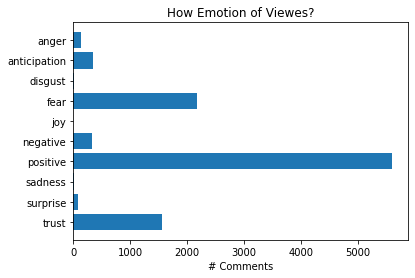

In [ ]:
# ploting the emotion of comments
emotion=df.groupby('emotion_top',as_index=False).agg({'Comments':'count'})
y=emotion['emotion_top']
x=emotion['Comments']

# plot
fig, ax = plt.subplots()
ax.barh(y, x, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# Comments')
ax.set_title('How Emotion of Viewes?')

from graph above we can conclude that many viewers give positive comments

# What Video Type is Suitable to Viewers

In this section, to analyze the suitable video, we sort the vids from view, subs added, %view, and share. Then from the video, we watch them and compare the top and bottom of each metric. 

First thing we need is check statististic description for view, subs added, %view, and share 

In [ ]:
# filter the timebound
start_date='2020-01-01'
end_date='2021-12-31'

#add vids length
df_vids_c=pd.merge(df_vids,video_length,right_on='External Video ID',left_on='Video',how='left').drop(columns='External Video ID')
df_vids_f=df_vids_c[(df_vids['Video publish time']>=start_date)&(df_vids['Video publish time']<=end_date)].copy()

#split video from short vids (under 60 second)
df_vids_f_short=df_vids_f[df_vids_f['Video Length']<=60].copy()
df_vids_f_long=df_vids_f[df_vids_f['Video Length']>60].copy()
df_vids_f_Vlong=df_vids_f[df_vids_f['Video Length']>588].copy()

In [ ]:
list_stat_desc=['Views','Shares','Average percentage viewed (%)','Subscribers','Average View Duration (second)','Watch time (hours)']
describe(df_vids_f[list_stat_desc], ['skew','var','kurt','range','cv','mode'])

,Views,Shares,Average percentage viewed (%),Subscribers,Average View Duration (second),Watch time (hours)
count,1.600000e+02,160.000000,160.000000,1.600000e+02,160.000000,1.600000e+02
mean,2.957824e+04,218.131250,32.481563,7.170438e+02,209.137500,1.716018e+03
std,1.046107e+05,858.889184,15.674460,3.845104e+03,101.320495,5.604708e+03
min,4.820000e+02,2.000000,5.230000,-2.100000e+01,25.000000,2.643460e+01
25%,4.568250e+03,24.750000,20.117500,2.275000e+01,149.000000,2.265182e+02
50%,9.094500e+03,50.000000,32.045000,6.600000e+01,202.500000,4.585429e+02
75%,2.010425e+04,133.250000,42.010000,2.645000e+02,246.250000,1.240921e+03
max,1.253559e+06,9583.000000,76.600000,4.645300e+04,621.000000,6.585070e+04
range,1.253077e+06,9581.000000,71.370000,4.647400e+04,596.000000,6.582427e+04
mode,3.615000e+03,8.000000,16.980000,1.300000e+01,230.000000,2.643460e+01


Yup, from the statistic description above, even with cleaned datasets, the deviation and Coefficient of variation are more than one, where the spread of data is wide. Also, the skew tends to the left for some metrics, in which many videos have low views, shares, and subs.

so we need to deep dive into why it happened and how to solve it

before we deep dive about it, let's see the histogram in each metrics

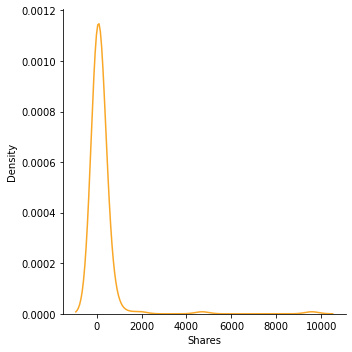

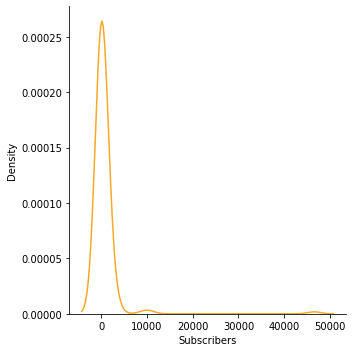

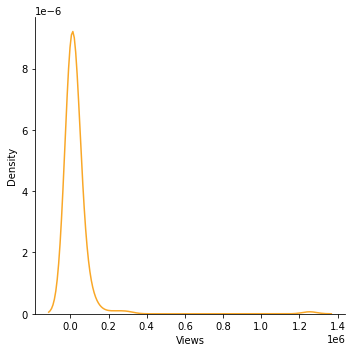

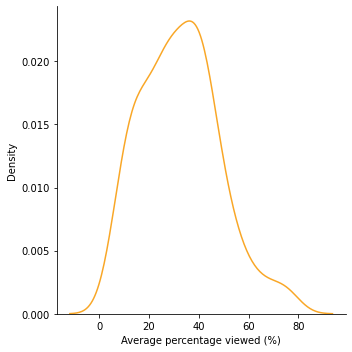

In [ ]:
sns.displot(df_vids_f, x='Shares', kind="kde",color='#F9A727')
sns.displot(df_vids_f, x='Subscribers', kind="kde",color='#F9A727')
sns.displot(df_vids_f, x='Views', kind="kde",color='#F9A727')
sns.displot(df_vids_f, x='Average percentage viewed (%)', kind="kde",color='#F9A727')

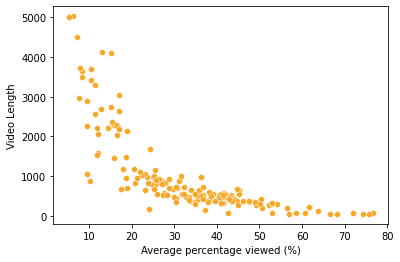

In [ ]:
sns.scatterplot(data=df_vids_f, x='Average percentage viewed (%)',y='Video Length',color='#F9A727')

In [ ]:
df_vids_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 59 to 218
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video                               160 non-null    object        
 1   Video title                         160 non-null    object        
 2   Video publish time                  160 non-null    datetime64[ns]
 3   Comments added                      160 non-null    int64         
 4   Shares                              160 non-null    int64         
 5   Dislikes                            160 non-null    int64         
 6   Likes                               160 non-null    int64         
 7   Subscribers lost                    160 non-null    int64         
 8   Subscribers gained                  160 non-null    int64         
 9   RPM (USD)                           160 non-null    float64       
 10  CPM (USD)                

and then subseting the data for each performance

In [ ]:
## About Share
# top 10 shares videos
share_t10=df_vids_f.sort_values(by='Shares',ascending=False).copy().head(10)
share_t10['note']='top'
# bottom 10 share videos
share_b10=df_vids_f.sort_values(by='Shares',ascending=False).copy().tail(10)
share_b10['note']='bottom'
#combine
share=pd.concat([share_t10,share_b10]).drop(columns={'RPM (USD)','CPM (USD)','Video'})

## About %view for long videos
# top 10 average view duration videos (no short vids)
aviewd_t10=df_vids_f_long.sort_values(by='Average percentage viewed (%)',ascending=False).copy().head(10)
aviewd_t10['note']='top'
# botom 10 average view duration videos (no short vids)
aviewd_b10=df_vids_f_long.sort_values(by='Average percentage viewed (%)',ascending=False).copy().tail(10)
aviewd_b10['note']='bottom'
#combine
aviewd=pd.concat([aviewd_t10,aviewd_b10]).drop(columns={'RPM (USD)','CPM (USD)','Video'})

## About New Subs
# top 10 adding new subs
subs_t10=df_vids_f_long.sort_values(by='Subscribers',ascending=False).copy().head(10)
subs_t10['note']='top'
# botom 10 adding new subs
subs_b10=df_vids_f_long.sort_values(by='Subscribers',ascending=False).copy().tail(10)
subs_b10['note']='bottom'
#combine
subs=pd.concat([subs_t10,subs_b10]).drop(columns={'RPM (USD)','CPM (USD)','Video'})

## About Views
# top 10 views videos
views_t10=df_vids_f.sort_values(by='Views',ascending=False).copy().head(10)
views_t10['note']='top'
# botom 10 views videos
views_b10=df_vids_f.sort_values(by='Views',ascending=False).copy().tail(10)
views_b10['note']='bottom'
#combine
views=pd.concat([views_t10,views_b10]).drop(columns={'RPM (USD)','CPM (USD)','Video'})

In [ ]:
share

,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second),Video Length,note
98,How I Would Learn Data Science (If I Had to St...,2020-05-08,907,9583,942,46903,451,46904,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14,189,516,top
77,The Best Free Data Science Courses Nobody is T...,2020-03-09,294,4694,75,19464,131,10734,33.80,0:02:06,297222,10465.0467,10603,1217.046,4512254,3.24,126,375,top
71,3 Proven Data Science Projects for Beginners (...,2020-02-17,220,1935,64,14708,72,9508,35.26,0:02:40,237467,10560.3597,9436,885.504,3137644,4.01,160,454,top
122,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,174,1265,59,4321,40,2585,15.89,0:06:04,168183,17039.6566,2545,894.753,2040561,4.71,364,2296,top
218,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,109,767,53,4413,46,2553,36.77,0:04:29,79283,5945.5420,2507,528.286,1420968,3.31,269,734,top
85,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,82,744,21,3197,22,3184,30.37,0:02:16,102854,3887.4233,3162,445.187,778177,5.35,136,448,top
170,How I Would Learn Data Science in 2021 (What H...,2020-12-19,232,741,63,5869,57,3358,41.01,0:03:45,123515,7724.2735,3301,929.400,1699309,3.93,225,549,top
101,How to Make A Data Science Portfolio Website w...,2020-05-15,93,584,32,2778,9,1234,23.81,0:03:17,69141,3791.5971,1225,392.228,1043886,3.95,197,829,top
107,The State of Data Science with Krish Naik & Th...,2020-06-05,267,544,61,633,38,335,9.52,0:03:36,20089,1205.8213,297,135.037,1191518,1.19,216,2269,top
171,What is the #66DaysOfData?,2020-12-26,96,541,13,1827,33,2395,29.91,0:02:20,52921,2070.8803,2362,228.911,338516,3.44,140,471,top


In [ ]:
views['Video']

,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second),Video Length,note
98,How I Would Learn Data Science (If I Had to St...,2020-05-08,907,9583,942,46903,451,46904,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14,189,516,top
77,The Best Free Data Science Courses Nobody is T...,2020-03-09,294,4694,75,19464,131,10734,33.80,0:02:06,297222,10465.0467,10603,1217.046,4512254,3.24,126,375,top
71,3 Proven Data Science Projects for Beginners (...,2020-02-17,220,1935,64,14708,72,9508,35.26,0:02:40,237467,10560.3597,9436,885.504,3137644,4.01,160,454,top
122,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,174,1265,59,4321,40,2585,15.89,0:06:04,168183,17039.6566,2545,894.753,2040561,4.71,364,2296,top
170,How I Would Learn Data Science in 2021 (What H...,2020-12-19,232,741,63,5869,57,3358,41.01,0:03:45,123515,7724.2735,3301,929.400,1699309,3.93,225,549,top
185,Why You Probably Won't Become a Data Scientist,2021-04-09,213,386,129,3225,67,2237,41.36,0:03:34,108133,6435.5906,2170,601.671,1302907,5.04,214,518,top
85,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,82,744,21,3197,22,3184,30.37,0:02:16,102854,3887.4233,3162,445.187,778177,5.35,136,448,top
177,Why I Quit Data Science,2021-02-12,165,197,159,2274,85,832,40.99,0:02:16,98777,3756.0683,747,399.180,659163,8.62,136,334,top
63,Data Science Certificate vs Bootcamp vs Master...,2020-01-18,239,456,48,2708,37,1576,36.21,0:05:53,92355,9057.2752,1539,767.493,2247912,2.78,353,975,top
65,How I Learned Data Science,2020-01-27,101,482,253,2514,51,2090,25.84,0:03:28,87169,5043.1516,2039,699.558,5447045,1.14,208,806,top



**From %View**

> The video that is watched a lot explains the importance of what is discussed with provides an overview (can be a picture/video with explanations and notes, and writings). In contrast to low interaction videos, videos that discuss reviews without any interaction on the camera provide small views coupled with a long video duration and poor audio quality, giving it less connotation.

**From Subscribers Add**

> Live Streaming content is not suitable to be used to increase subscribers. Moreover, content that increases subscribers is content that raises the topic 
1. help beginners
2. project related topics

**From Shares**
> almost the same as before, related topics that increase the number of shares are topics that discuss beginner advice and projects and avoid topics that are not related to data science or discuss daily life/vlogs because the number of shares is tiny


**From Views**

> same as before, things that increase viewers are related topics 
1. beginner advice 
2. relatable with data

> While topics that need to be avoided are discussions of daily vlogs and live streams, some videos discuss projects but have small views. Therefore, it is necessary to investigate why this may be lower while some projects topics have high views.

>two videos with a small number of views explain more verbal than written text explanations, so it is difficult to imagine what is being explained, and the tempo is too slow


In [ ]:
# let's check, is ken's explanations slow-paced tempo or not?
df[df['clean'].str.contains('slow')]['clean'].to_list()

['video actually came good time cause really burning im first solo project even though bad position made lot courses wrote first import pandas pd five weeks ago always feel like slower progress take easy start smaller jobs',
 'data analysis time consuming process miracle take place create data model take call based outcome data science mostly help companies making marketing sales decision final decision always stay people marketing sales veterans essence companies always look data scientists depend solely rather use helping tool core veterans companies nobody right mind change product price solely based data model yes demand data scientists eventually slow',
 'field continue rise slow morph',
 'hey ken read thinking fast slow yet constantly make bad wrong decisions without noticing psychological mechanisms behind mechanisms fundamental thinking even aware still prone making thinking errors basically half century kahnemann research distilled one concise densely written book probably bes

Yup, there's truth. The comments say slow tempo from **user_988**. But is it true ken speaks too fast?

In [ ]:
df[df['clean'].str.contains('fast')]['clean'].to_list()

['believe data science person life long learning attitude data science fast evolving field requires daily learning attitude',
 'thanks ken lesson projects probably valuable one article displayed make understand hard data science really trapped fallacy really really good something know stuff academic mindset found real world outside college know well solve problems aka finish projects need know things top head learned find process information fast known university probably would lot happier relaxed future',
 'hi ken thanks video software developer learning data science ibm coursera professional certificate practical stats data scientists book reilly would recommend learn ds fastest ok self teaching moment course chapter book per week thanks advance',
 'seem encouraging guide years old master degrees business administration statistics also done programming initial stage career working ict area recently acquired knowledge ml python wonder didnt think data scientist earlier anyway want one

Yup, no one said too fast. Maybe to try to reduce the video duration, try to speed up from the created video

# Try Categorize the Video

Previously, topic modeling was carried out regarding the title of the video because only two clusters were formed, which still intersect. Therefore let's try clusters based on several existing topics. that is

1. short and skits videos, or short joke videos
2. Project Related
3. Beginer advice
4. Informative


I've previously grouped them based on existing titles and playlists manualy using spreadsheet. so can easily to upload

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1fzhxOBGxIaPLS_JP1xJYHtscPYF74MqVenn7EPFW5Zk/edit#gid=0'
sheet_url_trf= sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
categorize= pd.read_csv(sheet_url_trf)
categorize.head()

,Title,LINK,Category
0,3 Proven Data Science Projects for Beginners (...,8igH8qZafpo,Beginner advice
1,A Quick Data Science Project Tip! #SHORTS,IoUWD1h6xUs,Beginner advice
2,Avoid These Data Science Resume Mistakes!,DM1eE_Coh6g,Beginner advice
3,Beginner Kaggle Data Science Project Walk-Thro...,I3FBJdiExcg,Beginner advice
4,Critiquing MY OWN Data Science Resume,lsXWVPzwZPk,Beginner advice


In [ ]:
combine=pd.merge(categorize,df_vids,left_on='LINK',right_on='Video',how='inner').drop(columns=['Title','LINK'])
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Category                            164 non-null    object        
 1   Video                               164 non-null    object        
 2   Video title                         164 non-null    object        
 3   Video publish time                  164 non-null    datetime64[ns]
 4   Comments added                      164 non-null    int64         
 5   Shares                              164 non-null    int64         
 6   Dislikes                            164 non-null    int64         
 7   Likes                               164 non-null    int64         
 8   Subscribers lost                    164 non-null    int64         
 9   Subscribers gained                  164 non-null    int64         
 10  RPM (USD)                 

## Performance each category videos

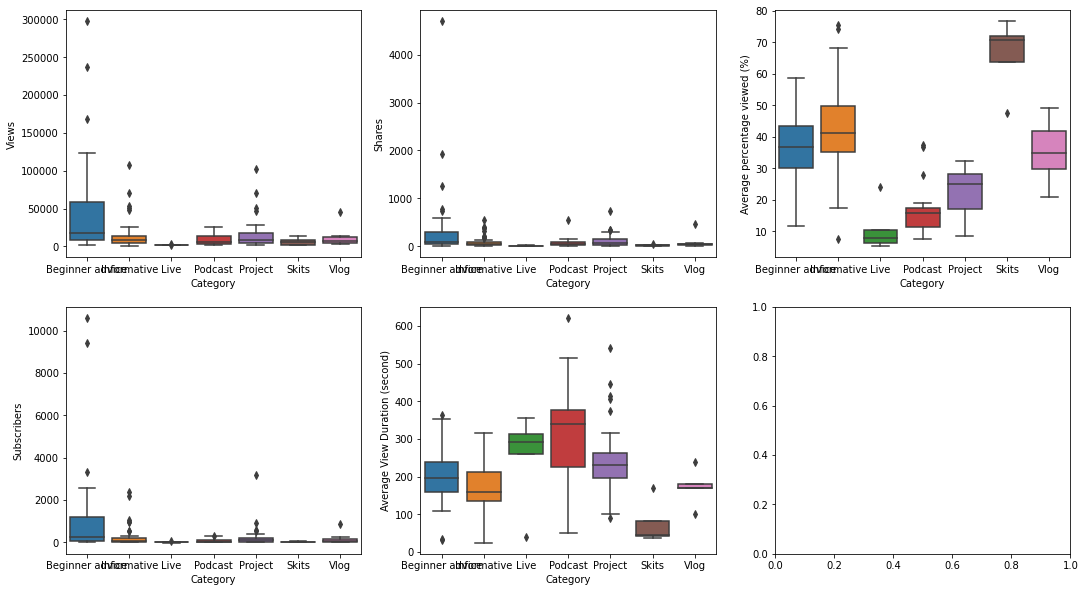

In [ ]:
#removing the outlier node for interpretation to see dispersion of data
combine=combine[combine['Views']<1000000]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(y="Views", x="Category",  data=combine,ax=axes[0, 0])
sns.boxplot(y="Shares", x="Category", data=combine,ax=axes[0, 1])
sns.boxplot(y="Average percentage viewed (%)", x="Category", data=combine,ax=axes[0, 2])
sns.boxplot(y="Subscribers", x="Category", data=combine,ax=axes[1, 0])
sns.boxplot(y="Average View Duration (second)", x="Category", data=combine,ax=axes[1, 1])

## Trend Views each Category Videos

In [ ]:
# take a video which published in 2021
start_date=pd.DataFrame({'date':[date(2021,1,1)]})
end_date=pd.DataFrame({'date':[date(2021,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])
limit=end_date.copy()
limit=limit+timedelta(days=30)

#filter video which published in range date
df_2=combine[(combine['Video publish time']>=start_date['date'][0])&(combine['Video publish time']<=end_date['date'][0])].copy()
df_2.head()

,Category,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,...,CPM (USD),Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%),Average View Duration (second)
1,Beginner advice,IoUWD1h6xUs,A Quick Data Science Project Tip! #SHORTS,2021-06-03,36,60,5,712,3,68,...,8.069,58.57,0:00:34,12328,118.3273,65,12.688,154198,2.73,34
11,Beginner advice,-ONQ628CXKQ,Data Scientist Reacts: REAL Data Science Job A...,2021-04-16,43,89,9,576,14,366,...,14.051,21.33,0:03:25,20158,1151.5371,352,96.734,195209,2.86,205
12,Beginner advice,7JCterBrcvk,Discouraged with Data Science? - Watch THIS vi...,2021-05-28,76,58,1,388,24,60,...,11.354,33.91,0:03:38,6825,414.0030,36,49.835,180455,2.32,218
13,Beginner advice,KU__lDJj5iU,How Data Science Projects Pay Off,2021-05-22,60,49,3,565,19,150,...,11.344,43.05,0:02:46,9342,431.1819,131,44.874,175035,3.33,166
19,Beginner advice,xpIFS6jZbe8,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,109,767,53,4413,46,2553,...,13.534,36.77,0:04:29,79283,5945.5420,2507,528.286,1420968,3.31,269


In [ ]:
ca

In [ ]:
#Beginner advice
beginner_list=df_2[df_2['Category']=='Beginner advice'].Video.to_list()
beginner=df_performance[df_performance['External Video ID'].isin(beginner_list)]
beginner=beginner.groupby('Date',as_index=False).agg({'Views':'sum'})
beginner['note']='beginner advice'


#Informative
informative_list=df_2[df_2['Category']=='Informative'].Video.to_list()
informative=df_performance[df_performance['External Video ID'].isin(informative_list)]
informative=informative.groupby('Date',as_index=False).agg({'Views':'sum'})
informative['note']='informative'

#Live
live_list=df_2[df_2['Category']=='Live'].Video.to_list()
live=df_performance[df_performance['External Video ID'].isin(live_list)]
live=live.groupby('Date',as_index=False).agg({'Views':'sum'})
live['note']='live'

#Podcast
podcast_list=df_2[df_2['Category']=='Podcast'].Video.to_list()
podcast=df_performance[df_performance['External Video ID'].isin(podcast_list)]
podcast=podcast.groupby('Date',as_index=False).agg({'Views':'sum'})
podcast['note']='podcast'

#Project
project_list=df_2[df_2['Category']=='Project'].Video.to_list()
project=df_performance[df_performance['External Video ID'].isin(project_list)]
project=project.groupby('Date',as_index=False).agg({'Views':'sum'})
project['note']='project'

#Skits
skits_list=df_2[df_2['Category']=='Skits'].Video.to_list()
skits=df_performance[df_performance['External Video ID'].isin(skits_list)]
skits=skits.groupby('Date',as_index=False).agg({'Views':'sum'})
skits['note']='skits'

#Vlog
vlog_list=df_2[df_2['Category']=='Vlog'].Video.to_list()
vlog=df_performance[df_performance['External Video ID'].isin(vlog_list)]
vlog=vlog.groupby('Date',as_index=False).agg({'Views':'sum'})
vlog['note']='vlog'

combine=pd.concat([beginner,informative,live,podcast,project,skits,vlog])


# How to increase CTR Impression

In [ ]:
# top 10 ctr in 2020-2021

#create filter range of date
start_date=pd.DataFrame({'date':[date(2020,1,1)]})
end_date=pd.DataFrame({'date':[date(2021,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])

#filter video which published in range date
df_vids_f=df_vids[(df_vids['Video publish time']>=start_date['date'][0])&(df_vids['Video publish time']<=end_date['date'][0])]

#inserting video thumbnail
df_slice=df_performance[['External Video ID','Thumbnail link']].copy()
df_slice.drop_duplicates(inplace=True)
df=pd.merge(df_vids_f,df_slice,left_on='Video',right_on='External Video ID',how='left').drop(columns='External Video ID')

# top 10 ctr in 2020-2021
t10_ctr_f=df.sort_values(by='Impressions click-through rate (%)',ascending=False).head(10).copy()
list_t10_ctr_f=t10_ctr_f['Thumbnail link'].to_list()
# worst 10 ctr in 2020-2021
b10_ctr_f=df.sort_values(by='Impressions click-through rate (%)',ascending=False).tail(10).copy()
list_b10_ctr_f=b10_ctr_f['Thumbnail link'].to_list()

i need import for new package for import image from URL link

In [ ]:
#!pip install pillow
import urllib.request
from PIL import Image

In [ ]:
# define collage of picture
def create_collage(width, height, listofimages):
    cols = 5
    rows = 2
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for row in range(rows):
        for col in range(cols):
            #print(i, x, y)
            new_im.paste(ims[i], (x, y))
            i += 1
            x += thumbnail_height
        y += thumbnail_width
        x = 0
    new_im.save("Collage.jpg")

top 10 thumbnail and tittle in channel

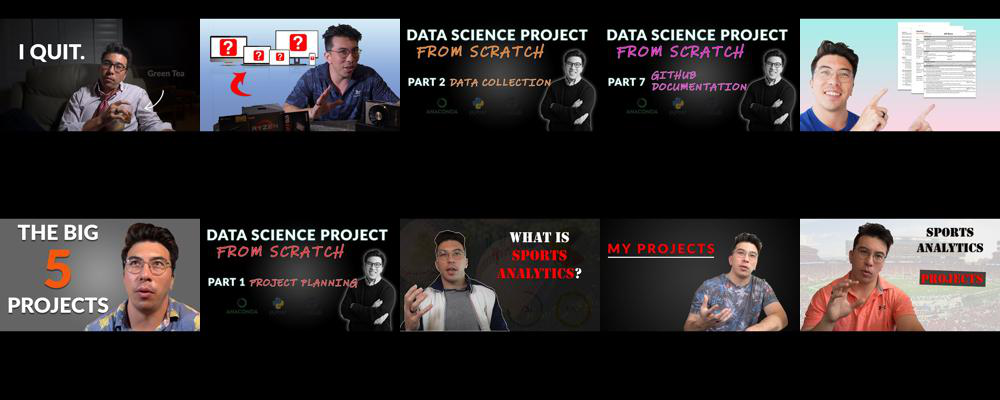

1   Why I Quit Data Science
2   The Best Computer for Data Science Beginners
3   Data Science Project from Scratch - Part 2 (Data Collection)
4   Data Science Project from Scratch - Part 7 (Documenting Your Work)
5   Reviewing Your Data Science Resumes - Episode 12 (3 Different Resumes!)
6   5 Essential Data Science Projects for Your Portfolio
7   Data Science Project from Scratch - Part 1 (Project Planning)
8   What is Sports Analytics Really?
9   The Data Science Projects that Got Me a Job
10   The 4 Types of Sports Analytics Projects


In [ ]:
for i,url in enumerate(list_t10_ctr_f):
    file_name='pict_'+str(i)+'.jpg'
    urllib.request.urlretrieve(url,file_name) #insert picture
    exec(f'img_{i} = Image.open(file_name)') #insert new variables in loop
    if i == 0:
        list_pict=[file_name]
    else:
        list_pict.append(file_name)
        
create_collage(1000,400, list_pict)
t10_f=Image.open("Collage.jpg")
display(t10_f)

list_title_t10=t10_ctr_f['Video title'].to_list()
for i,title in enumerate(list_title_t10):
  print(i+1,' ',title)

In [ ]:
list_b10_ctr_f

['https://i.ytimg.com/vi/BZFfNwj7JhE/hqdefault.jpg',
 'https://i.ytimg.com/vi/143WWA5Sy9k/hqdefault.jpg',
 'https://i.ytimg.com/vi/g7on3Rw0Ovg/hqdefault.jpg',
 'https://i.ytimg.com/vi/78LjdAAw0wA/hqdefault.jpg',
 'https://i.ytimg.com/vi/foggudmDDvY/hqdefault.jpg',
 'https://i.ytimg.com/vi/qUK5Vk4NvBw/hqdefault.jpg',
 'https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg',
 'https://i.ytimg.com/vi/ei1m5lDQyBg/hqdefault.jpg',
 'https://i.ytimg.com/vi/9D7GzskcyUk/hqdefault.jpg',
 'https://i.ytimg.com/vi/UcilY6HDuL8/hqdefault.jpg']

worst thumbnail

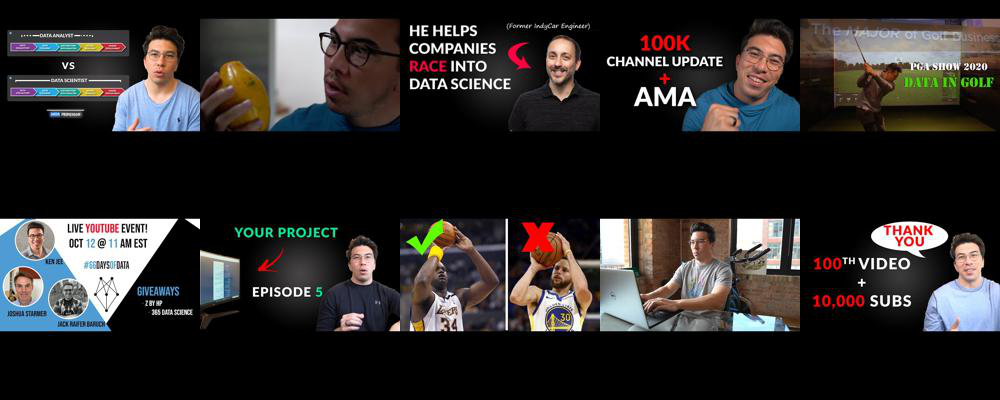

1   Different Data Science Roles Explained (by a Data Scientist)
2   I Eat a Papaya Live on Stream (Plus Q&A for 150K Subs!)
3   Fast Cars to Faster Data (Alex Castrounis) - KNN EP. 12
4   100K Channel Update + AMA Stream!
5   Data Science in Golf: PGA Merchandise Show 2020
6   #66DaysOfData Round 3 Live Event! (feat. @StatQuest with Josh Starmer)
7   Reviewing Your Data Science Projects - Episode 5 (Very Detailed Project)
8   Data Science in Sports - Talk for Northwestern (Kellogg) MBA Students
9   5 Tips for Crushing the Work From Home Life
10   10000 Subscriber and 100th Video Special (Data Science)


In [ ]:
for i,url in enumerate(list_b10_ctr_f):
    file_name='pict_'+str(i)+'.jpg'
    urllib.request.urlretrieve(url,file_name) #insert picture
    exec(f'img_{i} = Image.open(file_name)') #insert new variables in loop
    if i == 0:
        list_pict=[file_name]
    else:
        list_pict.append(file_name)
        
create_collage(1000,400, list_pict)
b10_f=Image.open("Collage.jpg")
display(b10_f)

list_title_b10=b10_ctr_f['Video title'].to_list()
for i,title in enumerate(list_title_b10):
  print(i+1,' ',title)

From the best impression, the title is was contradiction, dimana judul videonya memberikan kesan negatif kepada sesuatu hal, yang mana memberikan seolah olah jangan melakukan hal ini, karena blabalbala. dan thumbnail yang diberikan juga memberikan judul yang to the point dan sesuai dengan judul yang diberikan. serta dengan ekspresi yang tidak menyebalkan :)

# Export the datasets to Google Spreadsheet

In [ ]:
from google.colab import files

In [ ]:
combine.to_csv('topics_trend.csv', encoding = 'utf-8-sig') 
files.download('topics_trend.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name='country_agg.csv'
agg_country.to_csv(file_name, encoding = 'utf-8-sig') 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name='aviewd.csv'
aviewd.to_csv(file_name, encoding = 'utf-8-sig') 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name='share.csv'
share.to_csv(file_name, encoding = 'utf-8-sig') 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name='data_vids_f.csv'
df_vids_f.to_csv(file_name, encoding = 'utf-8-sig') 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_text_imp=df_text[['Date','clean','sentiment','sentiment_score']]
file_name='comments.csv'
df_text_imp.to_csv(file_name) 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

file_name='period.csv'
period.to_csv(file_name) 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name='combined.csv'
df_combined.to_csv(file_name, encoding = 'utf-8-sig') 
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>